<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Neural Networks with Keras

_Authors: Justin Pounders, Riley Dallas, Jeff Hale_

---


### Learning Objectives

We'll explore three feed-forward neural networks for tabular data problems.

*After this lesson, students will be able to:*

1. Build neural networks using TensorFlow Keras
1. Understand the differences in creating regression, binary classification, and multi-class classification NN models

####  Prereqs
- Python basics
- Machine learning workflow

#### Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split



<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 232 from PyObject


In [ ]:
# %pip install tensorflow # install tensorflow if needed

Check the TensorFlow version

If packages won't work on your local machine, hop over to Google Colab and upload the notebook to Colab. 🙂

# Model 1: Regression Problem
![](https://cdn.pixabay.com/photo/2018/02/02/13/10/one-3125379__480.jpg)

Source: pixabay.com


`make_regression` is a scikit-learn function for generating a random regression dataset. 

Use `make_regression` to generate 10,000 samples using 20 features.

### Train/Test Split
---

Create holdout/test set to evaluate our model on unseen data. Use the scikit-learn `train_test_split` function to split our `X` and `y` variables into a training set and a test/holdout set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

#### Check the shape of arrays.

In [ ]:
X_train.shape

In [ ]:
X_test.shape

#### Check the first observation

In [ ]:
X_train[0]

In [ ]:
y_train[0]

## Your first Neural Network!!
---

Next stop, [The Singularity](https://en.wikipedia.org/wiki/Technological_singularity)!

Creating a model in `tf.keras` entails a few steps:
1. Create your network topology (structure)
2. Compile your model ⭐️
3. Fit your model
4. Predict
5. Evaluate
---

TensorFlow has several APIs. Keras is the high-level one. Keras itself has several ways to make a model and it also exists as a separate package outside TensorFlow. 

TensorFlow and PyTorch are the most popular deep learning frameworks. 

Chollet is the creator of Keras. 


### 1. Create your network topology (structure)
---

We'll create a simple network with:
- an input layer
- one hidden layer.  
- an output layer. 

#### Use `relu` for the activation function ☝️
As a general rule, use `'relu'`for all hidden layers that need an activation funtion

#### Output layer for regression problems
For *all* regression problems, your output layer will be 1 neuron with *no* activation function. ⭐️

### 2. Compile your model
---

Whenever you compile your model, you have to specify a few things: 
1. The [loss function](https://keras.io/losses/) to use (depends on if it's regression, classification, etc)
2. Which optimizer to use (Use `'adam'` - there are others, but this it works well and a switch doesn't matter much.)
3. What [metrics](https://keras.io/metrics/) you'd like to monitor. 

### 3. Fit your model
---

When fitting your model, you need to specify a few things:
1. The number of epochs: start with 10. Simple to add more.
2. Your batch size: pick a number that is a power of 2 (32, 64, 128, or 256 are common). Bigger batches take more memory. Not a big deal.
3. Your validation data, which in this case is the test set.

#### Rerunning the above cell results in training the model further. ⭐️

#### Train for more epochs if the model is still improving on validation loss. ☝️

### 4. Predict
---

The TensorFlow Keras model has a `.predict()` method, similar to a scikit-learn estimator. It returns a 2D NumPy array (scikit-learn returns a 1D NumPy array). ⚠️

#### Make predictions

#### Check the type

### 5. Evaluate

Note the number to the left (the number of batches run).

#### Plot performance

## What did we just do?

1. Set up structure (input, hidden, output layers)
1. Compile
1. Fit - save the result
1. Predict/Evaluate

### Activity

Build a new regression network called `housing_ann` below using the same architecture as above.  Fit the model on the training data and visualize the loss on both train and test data.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
X, y = fetch_california_housing(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
#create sequential network

#add a dense layer with 100 nodes

#and an output with a single layer

#compile with loss = 'mse' and metrics = 'mae'

#fit and save results as "history"


In [5]:
#plot loss from history object


---
# Model 2: Binary Classification 
![laboratory](images/laboratory.jpg)
Source: pixabay.com

`make_classification` is similar to `make_regression`, except now we're predicting a class (0 or 1).

Use `make_classification` to generate 10,000 samples with 30 features.

#### Do a quick inspection

In [ ]:
X[0]

In [ ]:
y[0]

#### Train/Test Split

Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12, stratify=y)

In [ ]:
y.shape

In [ ]:
y.sum()

### Network Structure for Binary Classification
---
Let's add a layer to standardize and scale our data (really we should have done this above, too).

Let's add some hidden layers.

For *all* binary classification problems, your output layer will be 1 neuron with `'sigmoid'` activation function. Think `logistic`. It squashes the output to a value between 0 and 1 for predicting probabilities. 

This is a simple model architecture. 

How to choose the number of layers and nodes? Good article [here](https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/). 

### Compile the model
---

Specify:
1. Loss function to use: For binary classification, use `binary_crossentropy`. ([Description](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a))
2. Optimizer to use (Use `'adam'`). 
3. [Metrics](https://keras.io/metrics/) to monitor. Options include accuracy, AUC, Precision, Recall.

#### Using binary_crossentropy for the loss function is the big difference between regression and classification! ⚠️

### Fit your model
---

When fitting your model, specify:
1. The number of epochs.
2. Your batch size: pick a number that is a power of 2 (16, 32, 64, 128)
3. Your validation data or % of the training set to be the validation set.

#### Can pass your test set to be the validation data, instead of holding it out

`verbose=0` keeps things quiet.

### Visualizing model training
---

Whenever you fit your `keras` model, it returns a `History` object ([link](https://keras.io/visualization/#training-history-visualization)) that can be used for plotting.

Using the `history` object, plot the model's accuracy (for both train and validation).

In [ ]:
plt.plot(label='Val Accuracy')
plt.plot( label='Train Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Results')

### Activity

Build a binary classification model using the telecom churn data below.  Note that you will need to make all your features numeric as well as the target.

In [7]:
churn = pd.read_csv('data/telecom_churn.csv')

In [8]:
churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#fastest way to a model is to drop the state feature and use pd.get_dummies


In [9]:
#more challenging is to use the make_column_transformer 
from sklearn.compose import make_column_transformer

---
# Model 3: Multi-class Classification 
![](https://cdn.pixabay.com/photo/2013/01/27/13/15/flower-76336__340.jpg)

Source: pixabay.com

The `make_classification` function allows for multi-class problems as well. Simply increase the `n_classes` and voila!

**NOTE**: You'll need to increase `n_informative` as you increase `n_classes`.

In the cell below, let's create a dataset with three classes.

In [15]:
from keras.datasets import fashion_mnist, mnist

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

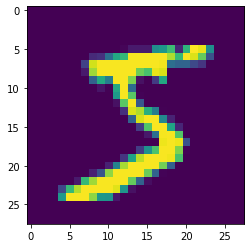

In [17]:
plt.imshow(x_train[0])

### One-hot Encoding Targets
---

With `keras`, you have to one-hot encode your `y` if it contains more than two classes. We'll use `keras`' built-in `to_categorical` function for this. ⚠️

### Flatten the images to single row
---------

### Network Structure for Multi-class Classification
---

For __all__ multi-class classification problems, your output layer will have the __same number of nodes as the number of classes__ in the problem. ☝️

The activation function will be `softmax`, which will normalize the predictions into probabilities that sum up to 1.0. ⭐️

### Let's add each layer as we instantiate, just for show

Each possible outcome needs a probability of being the correct outcome. Softmax with 3 nodes does the mapping for us. 🎉

### Compile your model
---

### Fit your model
---

### Visualize model training
---

Whenever you fit your `keras` model, it returns a `History` object that can be used for plotting.

Use the `history` object to plot the model's accuracy (for both train and test).

No handles with labels found to put in legend.


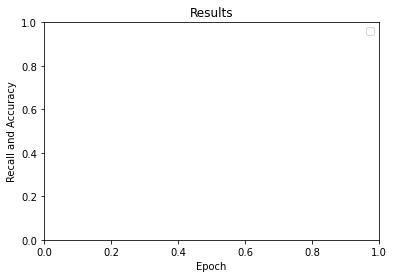

In [18]:

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Recall and Accuracy')
plt.title('Results');

## Exercise

Using the digits data below, build a multiclass classification model for the 10 classes.



In [ ]:
from keras.datasets import fashion_mnist

In [19]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [11]:
#build the network

#make sure last layer has 10 nodes with softmax activation

#compile with loss = 'categorical_crossentropy' and metrics = 'accuracy'


# Summary

You learned how to create a deep neural network in TensorFlow keras for regression, binary-classification, multi-class classification problems.

1. Structure
1. Compile
1. Fit
1. Predict & Evaluate

For the final layer, use either:
- a 1-node dense layer for regression
- a sigmoid layer for binary classification
- a softmax layer with the number of nodes=number of classes for multi-class classification

Other notes:
- Neural networks have many hyperparameters. For example, you can tweak the `learning_rate`, `momentum`, and `early_stopping` so training stops when improvement stops. 

- You can GridSearch by combining scikit-learn with Keras using the [Keras Classifier](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/).



## Check for understanding

- What activation function should you use for your hidden layers? Why?
- Do you need to one hot encode the y value for multi-class problems with Keras?
- How can you standardize data in a Keras model?
- What are the steps make and file a TensorFlow keras model?

## Bonus:  TensorBoard ⭐️

Tensorboard gives your a cool way to view results. 
We need to save our results to a file.

In [ ]:
# Install if needed
# !pip install tensorboard

In [ ]:
import tensorboard
import datetime
tensorboard.__version__

In [ ]:
%load_ext tensorboard

Set a file where your model fitting results will be saved

In [ ]:
logdir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

#### Define the Keras TensorBoard callback.

In [ ]:
import tensorflow as tf

In [ ]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

When you call `fit` pass it the callback. 

`callbacks=[tb_callback]`

Other potential callbacks include `early_stopping` so that your model stops training when it stops improving.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', metrics = 'accuracy')

In [ ]:
history = model.fit(
    X, 
    y, 
    validation_split=.25, 
    batch_size=64, 
    epochs=19, 
    callbacks=[tb_callback]
)

#### See your results in tensorboard.

In [ ]:
%tensorboard --logdir logs/fit